## Student Name: Saroj Lamichhane
## EDA

Q1 Answer:

In [1]:
#Import pandas library
import pandas as pd

#import the data 
data=pd.read_csv("cancer.csv")
data

#removing space in the column name
data.columns=data.columns.str.strip()


In [2]:
#check the summary statistics of the data
data.describe()

,Age,Year,Auxillary nodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### What can you conclude from methods of central tendency and deviation of the variables?


Answer: The mean on the Age is 52.53 with the standard deviation of 10.74. We can conclude there is no huge gap in ages of patients.

The standard deviation on Year is only 3.25 with the mean of 62.84, which tells most data lies towards the centre few variation.

On Auxillary nodes, the standard deviation is 7.19 and the mean is 4.03. Standard deviation is higher than the mean, there is a huge variance in the data of Auxillary nodes.

Survival is the dummy variable.

In [3]:
#check if there is a null value
data.isnull().sum()

Age                0
Year               0
Auxillary nodes    0
Survival           0
dtype: int64

<AxesSubplot:>

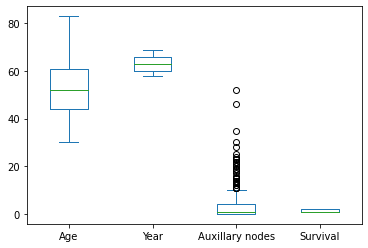

In [4]:
#draw a box plot to see if there is any outliers in the data
data.plot.box()

<AxesSubplot:>

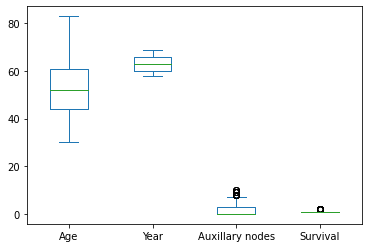

In [5]:
#remove upper bound data

#use formula, upperbound=Q3+1.5*(Q2-Q1)
upperbound=4 + 1.5*(4-0)

#new data with column that has no outliers
new_cancerdata=data[data["Auxillary nodes"]<=upperbound]

new_cancerdata.plot.box()

In [6]:
#check the correlation
relationship=new_cancerdata.corr()
relationship

,Age,Year,Auxillary nodes,Survival
Age,1.000000,0.092426,-0.108307,0.059688
Year,0.092426,1.000000,-0.006921,0.031328
Auxillary nodes,-0.108307,-0.006921,1.000000,0.236411
Survival,0.059688,0.031328,0.236411,1.000000


### Are there any correlated variables?

Answer: In a range from 0 to 1, the r is towards 0 which means there is no signigficant correlation between the variables.

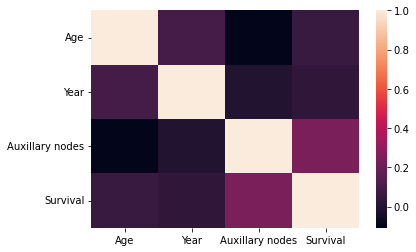

In [7]:
#visualize the correlation
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(relationship)
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillary nodes'}>,
        <AxesSubplot:title={'center':'Survival'}>]], dtype=object)

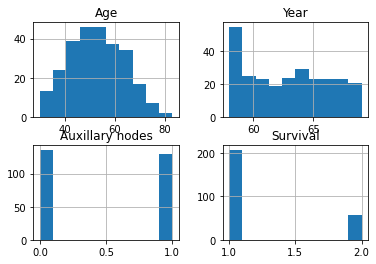

In [22]:
#draw histogram to check skewness
new_cancerdata.hist()

### Interpret the skewness of the variables.

Answer: Age is normally distributed. Year is positively and negatively skewed and Auxillary nodes is skewed towards right.Since there are only 265 rown and 5 columns, it may be the best possible distribution of the data.

In [23]:
#standardize and normalize by using scikit-learn library

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#standardize the data using scaler
scaler=StandardScaler()
scaler.fit(new_cancerdata)
scaled=scaler.fit_transform(new_cancerdata)
scaled_data=pd.DataFrame(scaled, columns=new_cancerdata.columns)
scaled_data

,Age,Year,Auxillary nodes,Survival
0,-2.078151,-0.258085,1.026790,-0.529333
1,-2.078151,0.661993,-0.973925,-0.529333
2,-1.986534,-1.178162,1.026740,-0.529333
3,-1.986534,0.661993,1.026826,-0.529333
4,-1.803300,-1.484854,1.026941,-0.529333
...,...,...,...,...
260,2.044615,-0.258085,1.026653,-0.529333
261,2.136233,1.275378,-0.973925,-0.529333
262,2.227850,0.661993,1.026790,-0.529333
263,2.319467,0.661993,1.026653,1.889171


In [24]:
#save the final file as csv
new_cancerdata.to_csv("FinalEDACancer.csv")